# Import common library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import sklearn
from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut, KFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

import tensorflow as tf

from statsmodels.api import OLS, add_constant

from mlxtend.feature_selection import SequentialFeatureSelector

In [2]:
print(f'Numpy version: {np.__version__}')
print(f'Pandas version: {pd.__version__}')
print(f'Seaborn version: {sns.__version__}')
print(f'Tensorflow version: {tf.__version__}')
print(f'Scikit-learn version: {sklearn.__version__}')

Numpy version: 1.23.5
Pandas version: 2.3.0
Seaborn version: 0.13.2
Tensorflow version: 2.12.0
Scikit-learn version: 1.7.0


<span> Data Cleaning </span>

In [ ]:
df.dropna()

df.drop_duplicates()

df.fillna(value={'column1': 10, 'column2':df['column2'].mean()}) # fill missing value in column 1 with 10



❌ **No — you should NOT use `.fit_transform()` every time, especially on test data.**
Here’s why:

---

### ✅ **Correct Practice**

| Data Type    | What to Use                     | Why                                          |
| ------------ | ------------------------------- | -------------------------------------------- |
| **Training** | `scaler.fit_transform(X_train)` | Learn mean/std **and** scale training data   |
| **Test**     | `scaler.transform(X_test)`      | Use training mean/std to transform test data |

---

### ❗ Why not `fit_transform()` on test data?

Using `.fit_transform(X_test)` **learns a new mean and std from test data**, which:

* **Leaks information** from test set (data leakage)
* **Makes model evaluation invalid**
* **Gives biased performance metrics**

---

### 📌 Best Workflow:

```python
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Training
X_train_scaled = scaler.fit_transform(X_train)

# Test (or validation)
X_test_scaled = scaler.transform(X_test)
```

---

### ✅ Bottom line:

Use `.fit_transform()` **only on training data**.
Use `.transform()` **on everything else** (validation, test, new data).

Let me know if you want a diagram or scikit-learn pipeline version!


Great question! The reason we use `train_test_split` **before** applying `StandardScaler` is to **prevent data leakage**.

---

### 🔑 **Data Leakage Explained**:

If you **scale the entire dataset before splitting**, then:

* The scaler "sees" the **test data** during `.fit()`
* It computes the **mean and standard deviation using all data**, including the test set
* This means your model **indirectly uses information from the test set during training**
* Your evaluation metrics will be **over-optimistic and invalid**

---

### ✅ Correct Order:

1. **Split the data first** using `train_test_split`
2. **Fit the scaler only on training data**
3. **Transform both training and test sets** using that scaler

```python
x_train, x_test = train_test_split(x)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
```

---

### 🧠 Analogy:

Imagine you're predicting exam scores, and you normalize scores using the **class average**.
If you compute the average using **everyone's** scores (including the future test-takers), you're cheating!

---

### ✅ Summary:

Always `train_test_split` **first**, then scale. This ensures the model only learns from training data — just like it would in the real world.


<h1 style='font-weight:bold; color:orange'>Introduction to Machine Learning (Week 1)</h1>

<h1 style='font-weight:bold; color:orange'>3 Linear Regression (Week 2, Chapter 3)</h1>

<h2 style='font-weight:bold; color:#00bfff'> 3.1 Simple Linear Regression </h2>

<h3 style='color:#00bfff; font-weight:bold'>using statsmodel</h3>

`getwd()`<br>
`setwd('D:/machine-learning/data')`<br>
`boston = read.csv('boston.csv')`<br>
`model = lm('medv ~ .', data = boston)`<br>
`summary(model)`<br>


In [9]:
from statsmodels.api import OLS, add_constant

boston = pd.read_csv('data/boston.csv')
# Y = medv (Median value of owner-occupied homes in $1000s)

# response variable is medv
y = boston['medv']

# predictor variables are all other columns (13 columns)
x = boston.drop('medv', axis=1)

# add constant for the intercept to predictor variables
# If no constant added, it will pass through the origin (0,0)
x1 = add_constant(x)

# create and fit the OLS model
model = OLS(y, x1).fit()

# print the summary of the model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 06 Jul 2025   Prob (F-statistic):          6.72e-135
Time:                        18:24:13   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
crim          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
zn             0.0464      0.014      3.382      0.001       0.019       0.073
indus          0.0206      0.061      0.334      0.738      -0.100       0.141
chas           2.6867      0.862      3.118      0.002       0.994       4.380
nox          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
rm             3.8099      0.418      9.116      0.000       2.989       4.631
age            0.0007      0.013      0.052      0.958      -0.025       0.027
dis           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
rad            0.3060      0.066      4.613      0.000       0.176       0.436
tax           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
ptratio       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
black          0.0093      0.003      3.467      0.001       0.004       0.015
lstat         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<h3 style='font-weight:bold; color:#00bfff'> Using scikit-learn </h3>

In [7]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [24]:
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

boston = pd.read_csv('data/boston.csv')

y = boston['medv']
x = boston.drop('medv', axis=1)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler, OneHotEncoder
scale = StandardScaler()
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

x_train_scale = scale.fit_transform(x_train.select_dtypes(include=['float64', 'int64']))
x_test_scale = scale.fit_transform(x_test.select_dtypes(include=['float64', 'int64']))

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

modle = lr.fit(x_train_scale, y_train)

print(lr.coef_)

print(lr.intercept_)


[-1.00213533  0.69626862  0.27806485  0.7187384  -2.0223194   3.14523956
 -0.17604788 -3.0819076   2.25140666 -1.76701378 -2.03775151  1.12956831
 -3.61165842]
22.796534653465347


<h1 style='font-weight:bold; color:orange'> 4 Classification (Week 3, Chapter 4) </h1>

In [25]:
default = pd.read_csv('data/default.csv')
print(default.head(10))
print('--------------------------------------------')
print(default.shape)

  default student      balance        income
0      No      No   729.526495  44361.625074
1      No     Yes   817.180407  12106.134700
2      No      No  1073.549164  31767.138947
3      No      No   529.250605  35704.493935
4      No      No   785.655883  38463.495879
5      No     Yes   919.588530   7491.558572
6      No      No   825.513331  24905.226578
7      No     Yes   808.667504  17600.451344
8      No      No  1161.057854  37468.529288
9      No      No     0.000000  29275.268293
--------------------------------------------
(10000, 4)


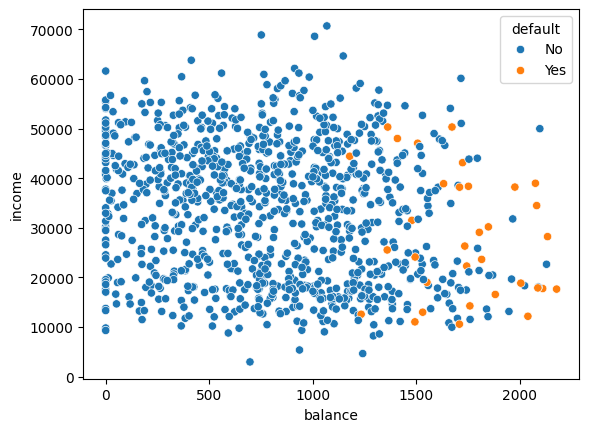

In [21]:
sns.scatterplot(x='balance', y='income', data=default.sample(1000), hue='default')
plt.show();

income does not influence whether a person default or not but balance does influence where a person with higher balance is more likely to default than a person with a lower balance.

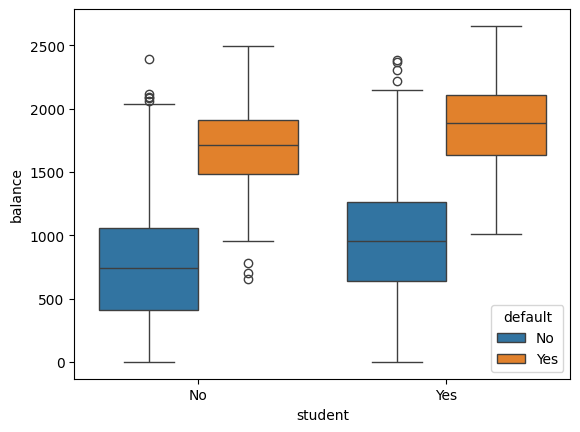

In [22]:
sns.boxplot(x='student', y='balance', data=default, hue='default');

Student or not does not effect whether a person is a defaulter or not.

In [23]:
default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


In [34]:
x_test_cat

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder


x = default.drop('default', axis=1)
y = default['default']

x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.2,
                                                    random_state=42)

scale = StandardScaler()
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

x_train_num = scale.fit_transform(x_train.select_dtypes(include=['float64']))
x_test_num = scale.fit_transform(x_test.select_dtypes(include=['float64']))

x_train_cat = ohe.fit_transform(x_train.select_dtypes(include=['object']))
x_test_cat = ohe.fit_transform(x_test.select_dtypes(include=['object']))

x_train_processed = np.hstack((x_train_num, x_train_cat))
x_test_processed = np.hstack((x_test_num, x_test_cat))

logreg = LogisticRegression()

logreg.fit(x_train_processed, y_train)

logreg.predict(x_train_processed)

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [ ]:
from sklearn.metrics import (
    confusion_matrix, accuracy_score, f1_score, classification_report
)

print("Logistic Regression performance:")
print(pd.DataFrame(confusion_matrix(y_test, logreg.predict(x_test_processed)), 
                   index = ['Yes', 'No'], columns=['Yes', 'No']))

print('==========')

print(f'Accuracy: {(accuracy_score(y_test, logreg.predict(x_test_processed)) * 100):.2f}%')

Logistic Regression performance:
      Yes  No
Yes  1920  11
No     50  19
Accuracy:96.95%


<h2 style='font-weight:bold; color:skyblue'> 4.1 Linear Discriminant Analysis (LDA) </h2>

* Used for multiclass classification problems
* Assume all predictors come from a **gaussian distribution**

In [60]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix

lda = LinearDiscriminantAnalysis()

lda.fit(x_train_processed, y_train)

print('Linear Discrimant Analysis performance:')
print(pd.DataFrame(confusion_matrix(y_test, lda.predict(x_test_processed)), 
                   index=['Yes', 'No'], columns=['Yes', 'No']))

print('==========')

print(f'Accuracy: {(accuracy_score(y_test, lda.predict(x_test_processed)) * 100):.2f}%')


Linear Discrimant Analysis performance:
      Yes  No
Yes  1925   6
No     57  12
Accuracy: 96.85%


<h2 style='font-weight:bold; color:skyblue'> 4.2 Quadratic Discriminant Analysis (QDA)</h2>

In [61]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()

qda.fit(x_train_processed, y_train)

print('Quadratic Discrimant Analysis performance:')
print(pd.DataFrame(confusion_matrix(y_test, qda.predict(x_test_processed)), 
                   index=['Yes', 'No'], columns=['Yes', 'No']))

print('==========')

print(f'Accuracy: {(accuracy_score(y_test, qda.predict(x_test_processed)) * 100):.2f}%')

Quadratic Discrimant Analysis performance:
      Yes   No
Yes  1730  201
No     38   31
Accuracy: 88.05%


c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


<h2 style='font-weight:bold; color:skyblue'> 4.3 K-Nearest Neighbor (KNN) </h2>

## 📘 **Example Problem**

You want to classify a new point using **K=3** based on the following training data:

| Point | X1 | X2 | Class |
| ----- | -- | -- | ----- |
| A     | 1  | 2  | 0     |
| B     | 2  | 3  | 0     |
| C     | 3  | 3  | 1     |
| D     | 6  | 5  | 1     |

And the **new point** to classify is:

```
New Point = (3, 2)
```

---

## 🧮 **Step 1: Compute Euclidean Distance**

Use the formula:

$$
d = \sqrt{(x_1 - x_1')^2 + (x_2 - x_2')^2}
$$

| Point | Coordinates | Distance to (3,2)                   |
| ----- | ----------- | ----------------------------------- |
| A     | (1, 2)      | √((3−1)² + (2−2)²) = √4 = **2.0**   |
| B     | (2, 3)      | √((3−2)² + (2−3)²) = √2 = **1.41**  |
| C     | (3, 3)      | √((3−3)² + (2−3)²) = √1 = **1.0**   |
| D     | (6, 5)      | √((3−6)² + (2−5)²) = √18 = **4.24** |

---

## 🔍 **Step 2: Find K Nearest Neighbors (K = 3)**

Sorted by distance:

1. C → 1.0 → Class 1
2. B → 1.41 → Class 0
3. A → 2.0 → Class 0

---

## 🗳️ **Step 3: Majority Vote**

Among the 3 nearest neighbors:

* Class 0: 2 votes (B, A)
* Class 1: 1 vote (C)

🎯 **Predicted class = 0**

---

## ✅ Final Answer:

**The new point (3, 2) is classified as Class 0.**


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(x_train, y_train)

confusion_matrix(x_test, knn.predict(y_test))

<h1 style='font-weight:bold; color:orange'> 5 Resampling Methods (Week 4, Chapter 5) </h1>

<h2 style='font-weight:bold; color:#00bfff'> 5.1 Cross Validation </h2>

<h3 style='font-weight:bold; color:#00bfff'> 5.1.1 The Validation Set Approach </h3>

The validation set approach split the data into two comparable size to validate the training data

In [62]:
# load data
auto = pd.read_csv('data/auto.csv')

# split data into training and test sets
auto_train, auto_test = train_test_split(auto, test_size=0.2, random_state=42)

# define the predictor and response variables for the training set
y_train = auto_train['mpg']
x_train = auto_train['horsepower'].values.reshape(-1, 1)

# define the predictor and response variables for the test set
y_test = auto_test['mpg']
x_test = auto_test['horsepower'].values.reshape(-1, 1)

# fit a linear regression model on the training set
lr = LinearRegression()
model = lr.fit(x_train, y_train)

# make predictions on the training set
train_pred = model.predict(x_train)

# make predictions on the test set
test_pred = model.predict(x_test)

# calculate the mean squared error on the training set
train_mse = mean_squared_error(y_train, train_pred)
print(f'Training set MSE: {train_mse:.2f}')

# calculate the mean squared error on the test set
test_mse = mean_squared_error(y_test, test_pred)
print(f'Testing set MSE: {test_mse:.2f}')

Training set MSE: 24.48
Testing set MSE: 22.15


In [ ]:
mse_train = []
mse_test = []

for i in range(10):
    # split data into training and test sets
    auto_train, auto_test = train_test_split(auto, test_size=0.2, random_state=i)

    # define the predictor and response variables for the training set
    y_train = auto_train['mpg']
    x_train = auto_train['horsepower'].values.reshape(-1, 1)

    # define the predictor and response variables for the test set
    y_test = auto_test['mpg']
    x_test = auto_test['horsepower'].values.reshape(-1, 1)

    # fit a linear regression model on the training set
    lr = LinearRegression()
    model = lr.fit(x_train, y_train)

    # make predictions on the training set
    train_pred = model.predict(x_train)

    # make predictions on the test set
    test_pred = model.predict(x_test)

    # calculate the mean squared error on the training set
    train_mse = mean_squared_error(y_train, train_pred)
    mse_train.append(train_mse)

    # calculate the mean squared error on the test set
    test_mse = mean_squared_error(y_test, test_pred)
    mse_test.append(test_mse)

print(f'Training MSE: {np.mean(mse_train):.2f}')
print(f'Test MSE: {np.mean(mse_test):.2f}')

Training MSE: 24.07
Test MSE: 23.62


<h3 style='font-weight:bold; color:#00bfff'> 5.1.2 Leave-One-Out-Cross-Validation </h3>

In [63]:
# define x and y
y = auto['mpg']
x = auto.drop(['mpg', 'name', 'origin'], axis=1).values.reshape(-1, 6)

# define loocv
loo = LeaveOneOut()

# perform loocv with negative mse
neg_mse = cross_val_score(lr, x, y, cv=loo, scoring='neg_mean_squared_error')

# convert to rmse
rmse = np.sqrt(-neg_mse)

# print the mean rmse
print(f'LOOCV RMSE: {rmse.mean():.2f}')

LOOCV RMSE: 2.67


<h3 style='font-weight:bold; color:#00bfff'> 5.1.3 k-Fold Cross-Validation </h3>

In [64]:
# define kfold
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# negative mse
neg_mse = cross_val_score(lr, x, y, cv=kf, scoring='neg_mean_squared_error')

# convert to rmse
rmse = np.sqrt(-neg_mse)

# print the mean rmse
print(f'KFold RMSE: {rmse.mean():.2f}')

KFold RMSE: 3.43


In [67]:
# manual k-fold

feature = []

model = LinearRegression()

kf = KFold(n_splits=10, shuffle=True, random_state=42)

# visualize the training and testing set for each folds
pd.DataFrame(kf.split(x))

mse_scores = []

# Perform k-fold cross-validation
for train_index, test_index in kf.split(x):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

np.mean(mse_scores)

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

Cuba buat manually to check output from the above function

In [ ]:
#  auto dataset has 392 rows and 9 columns

auto.sample(98)

(392, 9)

<h2 style='font-weight:bold; color:#00bfff'> 5.2 Bootstrap </h2>

Bootstrap is basically resampling with replacement

In [70]:
portfolio = pd.read_csv('data/portfolio.csv')
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   X           100 non-null    float64
 2   Y           100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [72]:
x = portfolio['X']
y = portfolio['Y']

# bootstrap
dfsample = portfolio.sample(frac=1, replace=True, random_state=42)
dfsample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 51 to 23
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   X           100 non-null    float64
 2   Y           100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 3.1 KB


<h1 style='font-weight:bold; color:orange'> 6 Linear Model Selection (Week 5, Chapter 6) </h1>

- This is also called **Feature Selection**
- alternative to least square

Advantage of Linear model
1. Inference

<h2 style='color:#00bfff; font-weight:bold'> 6.1 Subset Selection </h2>

<h3 style='color:#00bfff; font-weight:bold'> 6.1.1 Best Subset Selection </h3>

Fit a separate least square regression for each possible model. The number of model that we will fit is 2^p where p is the number of variable. For example, if a data has 20 predictor variable, then the number of model will be 2^20 = 1,048,576. This is a very high number of possibility and will use a lot of computational power to execute best subset selection.

**Cons**
1. Use high computational power if there is a lot number of variables
2. Higher search space leads to higher chance of finding model that overfit and have high variance on coefficient estimates

no 2 tu maksudnya lagi banyak option yang kita consider untuk bina model, lagi senang untuk kita dapat model yang perform bagus untuk training data tapi tak power untuk predict new/future data. Jadi model tu akan overfit dan ada variance yang tinggi.

<h3 style='color:#00bfff; font-weight:bold'> 6.1.2 Stepwise Selection </h3>

1. Forward Selection
2. Backward Selection
3. Forward-Backward Selection

<h4 style='color:#00bfff; font-weight:bold'> 6.1.2.1 Forward Selection </h4>

Begin with no predictor in the model. Then add one at a time until all predictors are in the model. 

Criteria when choosing model for each iteration
1. Lowest RSS
2. Highest R^2

In [ ]:
hitters = pd.read_csv('data/hitters.csv').dropna()

y = hitters['Salary']

df = pd.get_dummies(hitters[['League', 'Division', 'NewLeague']])

lr = LinearRegression()

def process(feature):
    model = lr.fit(x[feature], y)
    pred = model.predict(x[feature])
    mse = mean_squared_error(y, pred)
    return mse




,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,False,True,False,True,False,True
2,True,False,False,True,True,False
3,False,True,True,False,False,True
4,False,True,True,False,False,True
5,True,False,False,True,True,False
...,...,...,...,...,...,...
317,False,True,True,False,False,True
318,True,False,True,False,True,False
319,True,False,False,True,True,False
320,True,False,True,False,True,False


In [ ]:
# load data
hitters = pd.read_csv('data/hitters.csv').dropna()

# list out all columns with type 'object'
object = hitters.select_dtypes(include=['object']).columns

# remove all columns with type 'object'
hitter = hitters.drop(object, axis=1)

# define x and y
y = hitter['Salary'] 
x = hitter.drop('Salary', axis=1)

selected_features = []
remaining_features = list(x.columns)
scores_history = []
kf = KFold(n_splits=10, shuffle=True, random_state=42)

for feature in remaining_features:
    current_features = selected_features + [feature] # add list to list, maybe can use append
    subset = x[current_features]
    

model = LinearRegression()
mse = cross_val_score(model, subset, y, cv=kf, scoring='neg_mean_squared_error')
avg_mse = np.mean(mse)

np.argmax()

-205708.8753359605


<h4 style='font-weight:bold; color:#00bfff'> Backward Selection </h4>

In [ ]:
x = add_constant(hitter.drop('Salary', axis=1))
y = hitter['Salary']

model = OLS(y, x).fit()

feature = list(x.columns)

while len(feature) > 0:
    x_opt = x[feature]
    model = OLS(y, x_opt).fit()
    p_val = model.pvalues
    max_p_val = p_val.max()

    if max_p_val > 0.05:
        excluded_feature = p_val.idxmax()
        feature.remove(excluded_feature)
        print(max_p_val)

    else:
        break

model

<h4 style='font-weight:bold; color:#00bfff'> Forward-Backward Selection </h4>

<h1 style='font-weight:bold; color:orange'> 7 Nonlinear models (Week 6, Chapter 7) </h1>

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.api import GLS

In [ ]:
wage = pd.read_csv('data/wage.csv')
print(wage.shape)
print('--------------------------------------------')
print(wage.head(5))
print('--------------------------------------------')
print(wage.info())

(3000, 12)
--------------------------------------------
   year  age      sex            maritl      race        education  \
0  2006   18  1. Male  1. Never Married  1. White     1. < HS Grad   
1  2004   24  1. Male  1. Never Married  1. White  4. College Grad   
2  2003   45  1. Male        2. Married  1. White  3. Some College   
3  2003   43  1. Male        2. Married  3. Asian  4. College Grad   
4  2005   50  1. Male       4. Divorced  1. White       2. HS Grad   

               region        jobclass          health health_ins   logwage  \
0  2. Middle Atlantic   1. Industrial       1. <=Good      2. No  4.318063   
1  2. Middle Atlantic  2. Information  2. >=Very Good      2. No  4.255273   
2  2. Middle Atlantic   1. Industrial       1. <=Good     1. Yes  4.875061   
3  2. Middle Atlantic  2. Information  2. >=Very Good     1. Yes  5.041393   
4  2. Middle Atlantic  2. Information       1. <=Good     1. Yes  4.318063   

         wage  
0   75.043154  
1   70.476020  
2  130

In [ ]:
x = add_constant(wage['age'])
y = wage['wage']
model = OLS(y, x).fit()
prediction = model.predict(x)

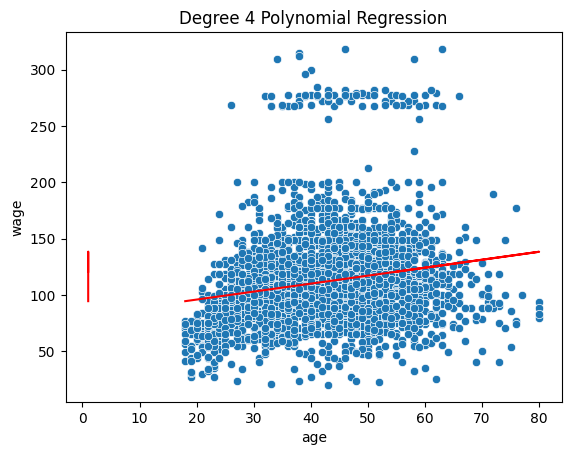

In [ ]:
sns.scatterplot(x='age', y='wage', data=wage)
plt.plot(x, prediction, color='red', label='predicted value')
plt.title('Degree 4 Polynomial Regression')
plt.show();

In [ ]:
x_poly = PolynomialFeatures(degree=2).fit_transform(wage['age'].values.reshape(-1, 1))
y = wage['wage']

print(LinearRegression().fit(x_poly, y).intercept_)

-10.425224262028578


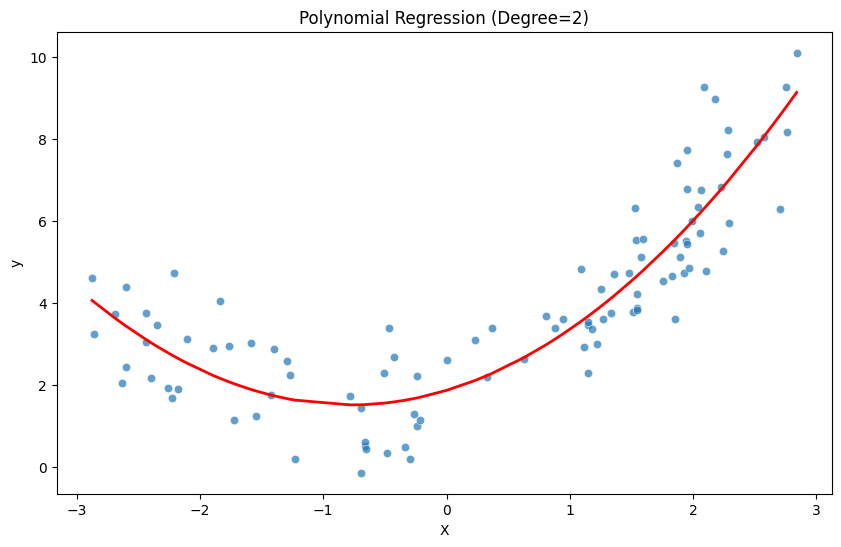

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Generate data
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

# Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Fit model and predict
model = LinearRegression().fit(X_poly, y)
predictions = model.predict(X_poly)

# Sort X and predictions for proper plotting
sorted_indices = np.argsort(X[:, 0])
X_sorted = X[sorted_indices]
predictions_sorted = predictions[sorted_indices]

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_sorted[:, 0], y=y[sorted_indices][:, 0], alpha=0.7)
plt.plot(X_sorted[:, 0], predictions_sorted[:, 0], 'r-', linewidth=2)
plt.title("Polynomial Regression (Degree=2)")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [ ]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False) # try to include bias
x_poly = poly.fit_transform(X)
prediction = LinearRegression().fit(x_poly, y).predict(x_poly)

sns.scatterplot(x=x_poly, y=y)
plt.plot(X, prediction)

ValueError: Per-column arrays must each be 1-dimensional

<h1 style='font-weight:bold; color:orange'> 8 Tree Based Method </h1>

|hai|name|
|---:|---:|
|hello|hazim|

**Advantage**
1. Easy to interpret/explain
2. Closely mirror human decision-making
3. Can be displayed graphically
4. Can handle qualitative (categorical) variables without OHE

**Disadvantage**
1. Lower prediction accuray
2. Trees can be non-robust (A small change in the data can cause a large change in the final estimated tree)

<h2 style='font-weight:bold; color:skyblue'> Classification Tree </h2>

In [90]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

In [180]:
carseat = pd.read_csv('data/carseats.csv')
carseat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In order to use classification tree, we need to convert reponse predictor variables into categorical and all categorical predictor variables into continous
* X (predictor) : categorical to continous
* Y (response) : continous to categorical (1 and 0)

In [181]:
# convert continous variable 'Sales' into categorical 'High', 1 if Sales > 8 else 0
carseat['High'] = carseat['Sales'].apply(lambda x: 1 if x > 8 else 0)

carseat['ShelveLoc'] = carseat['ShelveLoc'].map({'Bad': 0, 'Medium': 1, 'Good': 2})
carseat['Urban'] = carseat['Urban'].map({'No': 0, 'Yes': 1})
carseat['US'] = carseat['US'].map({'No': 0, 'Yes':1})

In [182]:
# define response and predictor variables
y = carseat['High']
x = carseat.drop(['Sales', 'High'], axis=1)

# split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# fit model
model = DecisionTreeClassifier(max_depth=6, random_state=42)
model.fit(x_train, y_train)
print(f'Model Score for Training Set: {(model.score(x_train, y_train) * 100):.2f}%')
print(f'Model Score for Testing Set: {(model.score(x_test, y_test) * 100):.2f}%')

print('==========')

print(f'Accuracy score for Testing Set: {(accuracy_score(y_test, model.predict(x_test)) * 100):.2f}%')

print('==========')

print('Confusion Matrix: ')
print(pd.DataFrame(confusion_matrix(y_test, model.predict(x_test)),
                   index=['Yes', 'No'],
                   columns=['Yes', 'No']))


Model Score for Training Set: 91.56%
Model Score for Testing Set: 77.50%
Accuracy score for Testing Set: 77.50%
Confusion Matrix: 
     Yes  No
Yes   37   6
No    12  25


In [184]:
pred = model.predict(x_test)
print(f'Model Score for Test Set: {(model.score(x_test, y_test) * 100):.2f}%')

Model Score for Test Set: 77.50%


In [185]:
print(pd.DataFrame(confusion_matrix(y_test, pred).T, 
                   index = ['Yes', 'No'], 
                   columns=['Yes', 'No']))

     Yes  No
Yes   37  12
No     6  25


<h2 style='font-weight:bold; color:skyblue'> Bagging </h2>

* Train a lot of decision tree at the same time
* Each decision tree are using different dataset that has been resample from the original dataset
* **Bootstrap**: resample 100 data from the original 100 data with replacement (some observation are taken multiple times, some are not taken at all)
* **Bootstrap Aggregation**

<h2 style='font-weight:bold; color:skyblue'> Random Forest </h2>

In [186]:
# fit random forest regressor model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

# make predictions on the test set
pred = rf.predict(x_test)

print(f'Model Score for Test Set: {(rf.score(x_test, y_test) * 100):.2f}%')


Model Score for Test Set: 46.39%


<h2 style='font-weight:bold; color:skyblue'> Boosting </h2>

* **n_estimators**: Number of decision trees
* **learning_rate (shrinkage) $\lambda$**: 
* **max_depth**: maximum depth of each decision tree. Deeper depth can capture more complex model, but it will prone to overfitting especially with high learning rate.

In [187]:
from sklearn.ensemble import GradientBoostingRegressor

boost = GradientBoostingRegressor(n_estimators=500, learning_rate=0.01, max_depth=4,
                                  random_state=42)

boost.fit(x_train, y_train)

print(f'MSE for Training Set: {mean_squared_error(y_train, boost.predict(x_train)):.4f}')
print(f'MSE for Testing Set: {mean_squared_error(y_test, boost.predict(x_test)):.4f}')

MSE for Training Set: 0.0211
MSE for Testing Set: 0.1385


In [189]:
print(pd.DataFrame({'Variable':x.columns, 
                    'Importance':boost.feature_importances_}))

      Variable  Importance
0    CompPrice    0.116175
1       Income    0.106623
2  Advertising    0.121085
3   Population    0.030032
4        Price    0.289173
5    ShelveLoc    0.186637
6          Age    0.108056
7    Education    0.030398
8        Urban    0.002758
9           US    0.009062


<h1 style='font-weight:bold; color:orange'> 9 Support Vector Machine (SVM) </h1>

Recommended dataset for praticing SVC
* **Linear Kernel**: Iris, Breast Cancer, Wine
* **RBF Kernel / Non-Linear**: Moons Circles, Digits, MNIST
* **High-dimensional data**: SpamBase, MNIST
* **Imbalanced data**: Breast Cancer, Titanic

**Kernel**
* **linear**: linear plane
* **poly**: polynomial kernel
* **rbf**: radial basis function (radial kernel)

In [78]:
from sklearn.svm import SVC # Support Vector Classifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
import pandas as pd

In [79]:
# Optical Recognition of Handwritten Digits dataset
train = pd.read_csv('data/optdigits.tra', header=None)
x_train = train.drop(64, axis=1)  # drop the last column (label)
y_train = train[64]  # last column is the label

test = pd.read_csv('data/optdigits.tes', header=None)
x_test = test.drop(64, axis=1)  # drop the last column (label)
y_test = test[64]  # last column is the label

print(f'Train set shape: {x_train.shape}')
print(f'Test set shape: {x_test.shape}')

Train set shape: (3823, 64)
Test set shape: (1797, 64)


In [ ]:
print(f'Null values in train set: {train.isna().sum().sum()}')
print(f'Duplicated values in train set: {train.duplicated().sum()}')
print(f'Null values in test set: {test.isna().sum().sum()}')
print(f'Duplicated values in test set: {test.duplicated().sum()}')

Null values in train set: 0
Duplicated values in train set: 0
Null values in test set: 0
Duplicated values in test set: 0


C : Regularization parameter

small C => wider margin and tolerate more misclassification (prevent overfit)

large C => narrow margin, tries to classify all training examples correctly (risk of overfit)

to find the best value of C, use cross validation `GridSearchCV`

In [ ]:
svc = SVC(kernel='linear', C=10, random_state=42)
svc.fit(x_train, y_train)

pred = svc.predict(x_train)
print(f'Train set accuracy: {(svc.score(x_train, y_train) * 100):.2f}%')
print(pd.DataFrame(confusion_matrix(y_train, pred)))
print('===================================================')
print(f'Test set accuracy: {(svc.score(x_test, y_test) * 100):.2f}%')
print(pd.DataFrame(confusion_matrix(y_test, svc.predict(x_test))))

Train set accuracy: 100.00%
     0    1    2    3    4    5    6    7    8    9
0  376    0    0    0    0    0    0    0    0    0
1    0  389    0    0    0    0    0    0    0    0
2    0    0  380    0    0    0    0    0    0    0
3    0    0    0  389    0    0    0    0    0    0
4    0    0    0    0  387    0    0    0    0    0
5    0    0    0    0    0  376    0    0    0    0
6    0    0    0    0    0    0  377    0    0    0
7    0    0    0    0    0    0    0  387    0    0
8    0    0    0    0    0    0    0    0  380    0
9    0    0    0    0    0    0    0    0    0  382
Test set accuracy: 96.10%
     0    1    2    3    4    5    6    7    8    9
0  177    0    0    0    0    1    0    0    0    0
1    0  178    0    0    0    0    3    0    1    0
2    0    7  170    0    0    0    0    0    0    0
3    1    0    5  171    0    2    0    2    1    1
4    0    0    0    0  180    0    0    0    1    0
5    0    0    1    0    0  180    0    0    0    1
6    0    

In [ ]:
# determine the optimal value of C
tuned_parameters = {'C': [0.1, 1, 10, 100, 1000]}
clf = GridSearchCV(SVC(kernel='linear', random_state=42), tuned_parameters, cv=10, scoring='accuracy')
clf.fit(x_train, y_train)
clf.best_params_

{'C': 0.1}

In [ ]:
svc = SVC(kernel='linear', C=0.1, random_state=42)
svc.fit(x_train, y_train)

pred = svc.predict(x_train)
print(f'Train set accuracy: {(svc.score(x_train, y_train) * 100):.2f}%')
print(pd.DataFrame(confusion_matrix(y_train, pred)))
print('===================================================')
print(f'Test set accuracy: {(svc.score(x_test, y_test) * 100):.2f}%')
print(pd.DataFrame(confusion_matrix(y_test, svc.predict(x_test))))

Train set accuracy: 99.97%
     0    1    2    3    4    5    6    7    8    9
0  376    0    0    0    0    0    0    0    0    0
1    0  389    0    0    0    0    0    0    0    0
2    0    0  380    0    0    0    0    0    0    0
3    0    0    0  389    0    0    0    0    0    0
4    0    0    0    0  387    0    0    0    0    0
5    0    0    0    0    0  376    0    0    0    0
6    0    0    0    0    0    0  377    0    0    0
7    0    0    0    0    0    0    0  387    0    0
8    0    1    0    0    0    0    0    0  379    0
9    0    0    0    0    0    0    0    0    0  382
Test set accuracy: 96.16%
     0    1    2    3    4    5    6    7    8    9
0  177    0    0    0    0    1    0    0    0    0
1    0  177    0    0    0    0    3    0    2    0
2    0    7  170    0    0    0    0    0    0    0
3    1    0    5  171    0    2    0    2    1    1
4    0    0    0    0  180    0    0    0    1    0
5    0    0    1    0    0  180    0    0    0    1
6    0    0

<h2 style='font-weight:bold; color:skyblue'> Radial Basis Function (RBF) </h2>

<h1 style='font-weight:bold; color:orange'> 10 Unsupervised Learning </h1>

* When our data does not have response (Y) value
* When we want to find interesting things in explanatory (X) variables

<h2 style='font-weight:bold; color:skyblue'> 10.1 Principal Component Analysis (PCA) </h2>

In [9]:
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [29]:
arrest = pd.read_csv('Data/USArrests.csv', index_col='Unnamed: 0')
arrest.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [30]:
scale = StandardScaler()
arrest_scale = scale.fit_transform(arrest)
pd.DataFrame(arrest_scale, columns=arrest.columns)

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814
5,0.025976,0.402909,0.869548,1.883901
6,-1.040880,-0.736484,0.799761,-1.092723
7,-0.437875,0.815030,0.450825,-0.585834
8,1.765415,1.990786,1.009122,1.150530
9,2.229265,0.487757,-0.386621,0.492653


In [33]:
scale = StandardScaler()
arrest_scale = scale.fit_transform(arrest)

pca = PCA()
pca.fit(arrest_scale)

pca_loadings = pd.DataFrame(pca.fit(arrest_scale),
                            index=arrest.index,
                            columns=['V1', 'V2', 'V3', 'V4']) # principal components
pca_loadings

,V1,V2,V3,V4
Alabama,PCA(),PCA(),PCA(),PCA()
Alaska,PCA(),PCA(),PCA(),PCA()
Arizona,PCA(),PCA(),PCA(),PCA()
Arkansas,PCA(),PCA(),PCA(),PCA()
California,PCA(),PCA(),PCA(),PCA()
Colorado,PCA(),PCA(),PCA(),PCA()
Connecticut,PCA(),PCA(),PCA(),PCA()
Delaware,PCA(),PCA(),PCA(),PCA()
Florida,PCA(),PCA(),PCA(),PCA()
Georgia,PCA(),PCA(),PCA(),PCA()


In [25]:
pca = PCA()

df_plot = pd.DataFrame(pca.fit_transform(arrest_scale), 
                       columns=['PC1', 'PC2', 'PC3', 'PC4'], 
                       index=arrest.index)

df_plot

,PC1,PC2,PC3,PC4
Alabama,0.985566,-1.133392,-0.444269,-0.156267
Alaska,1.950138,-1.073213,2.040003,0.438583
Arizona,1.763164,0.745957,0.054781,0.834653
Arkansas,-0.141420,-1.119797,0.114574,0.182811
California,2.523980,1.542934,0.598557,0.341996
Colorado,1.514563,0.987555,1.095007,-0.001465
Connecticut,-1.358647,1.088928,-0.643258,0.118469
Delaware,0.047709,0.325359,-0.718633,0.881978
Florida,3.013042,-0.039229,-0.576829,0.096285
Georgia,1.639283,-1.278942,-0.342460,-1.076797


<h2 style='font-weight:bold; color:skyblue'> 10.2 Clustering </h2>

<h3 style='font-weight:bold; color:green'> 10.2.1 K-Means </h3>

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)

kmeans.fit(x)

<h3 style='font-weight:bold; color:green'> 10.2.2 K-Modes </h3>

init :
1. **Huang**
2. **Cao**

In [36]:
from kmodes.kmodes import KModes

<h3 style='font-weight:bold; color:green'> 10.2.3 K-Medoid </h3>

<h3 style='font-weight:bold; color:green'> 10.2.4 K-Prototype </h3>

<h3 style='font-weight:bold; color:green'> 10.2.5 Hierarchical </h3>

* Unlike K-Means, there is no need to pre-determine number of clusters

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import linkage, dendrogram

In [ ]:
nci_labs = pd.read_csv("data/NCI60_labs.csv", index_col=0)
nci_data = pd.read_csv('data/nci60_data.csv', index_col=0)

nci_data.info() # data with a huges number of features (around 6830)


<class 'pandas.core.frame.DataFrame'>
Index: 64 entries, V1 to V64
Columns: 6830 entries, 1 to 6830
dtypes: float64(6830)
memory usage: 3.3+ MB


In [ ]:
?linkage

In [ ]:
nci_hc_complete = linkage(y=nci_data, 
                          method="complete", 
                          metric='euclidean') 
nci_hc_complete

array([[ 49.        ,  50.        ,  38.23033267,   2.        ],
       [ 56.        ,  57.        ,  39.10562479,   2.        ],
       [ 48.        ,  64.        ,  39.99989876,   3.        ],
       [ 20.        ,  21.        ,  45.15158096,   2.        ],
       [ 34.        ,  35.        ,  45.35338129,   2.        ],
       [ 36.        ,  68.        ,  48.01162819,   3.        ],
       [  0.        ,   1.        ,  51.43823073,   2.        ],
       [ 60.        ,  61.        ,  56.78015373,   2.        ],
       [ 11.        ,  12.        ,  57.91726379,   2.        ],
       [ 41.        ,  43.        ,  60.49650657,   2.        ],
       [ 38.        ,  39.        ,  61.55425326,   2.        ],
       [ 30.        ,  31.        ,  61.63750362,   2.        ],
       [ 14.        ,  15.        ,  62.1780594 ,   2.        ],
       [ 13.        ,  76.        ,  62.78163258,   3.        ],
       [ 44.        ,  45.        ,  63.26414098,   2.        ],
       [ 59.        ,  71

Text(0.5, 1.0, 'Linkage=complete')

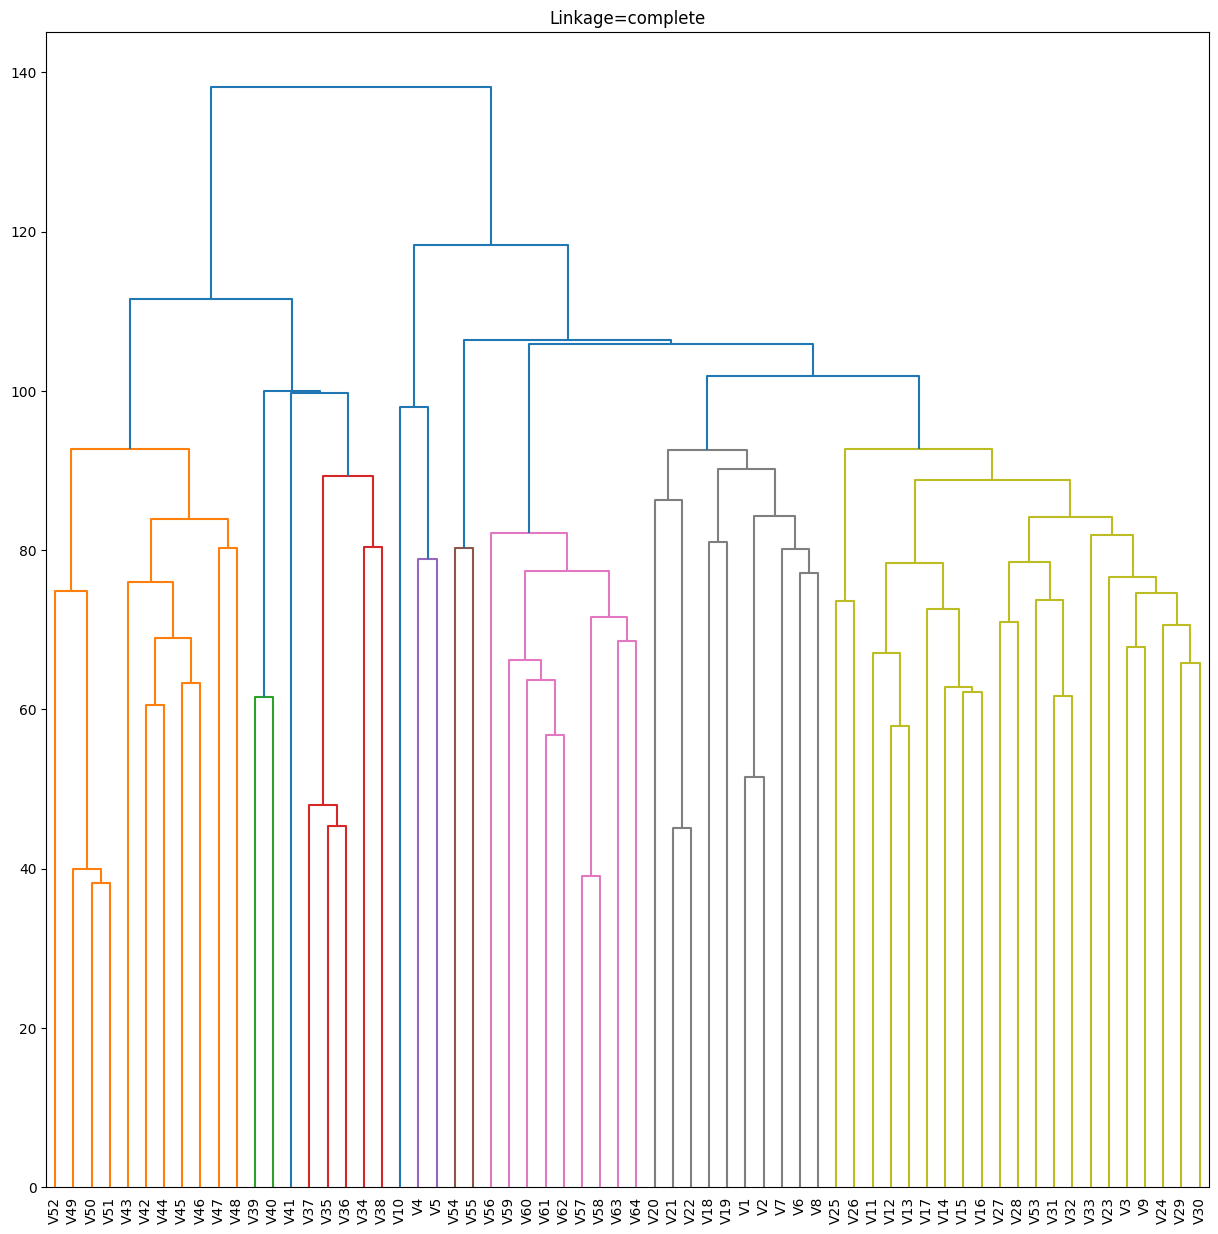

In [59]:
fig, axis = plt.subplots(1, 1, figsize=(15,15))

dendrogram(nci_hc_complete, 
           ax=axis, 
           labels=nci_data.index, 
           leaf_rotation=90, 
           leaf_font_size=10)

axis.set_title('Linkage=complete')



In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()

nci_scale = scaler.fit_transform(nci_data)

pca = PCA(n_components=2)

nci_reduce = pca.fit_transform(nci_scale)
pd.DataFrame(nci_reduce)

,0,1
0,19.838032,-3.556131
1,23.089217,-6.441309
2,27.456107,-2.465335
3,42.816891,9.770332
4,55.418495,5.198344
...,...,...
59,17.996259,47.242927
60,4.415491,42.309182
61,22.966980,36.101936
62,19.175928,50.396686


<Axes: xlabel='X1', ylabel='X2'>

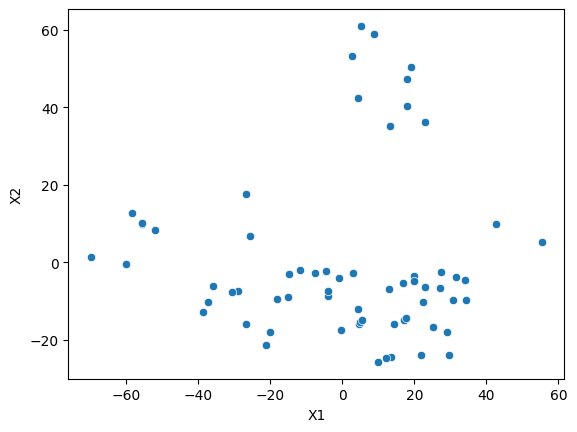

In [ ]:
import seaborn as sns

df = pd.DataFrame(nci_reduce, columns=['X1', 'X2'], index=)

df.columns
sns.scatterplot(x='X1', y='X2', data=df)

<h1 style='font-weight:bold; color:orange'> 11 Neural Network </h1>

<h2 style='font-weight:bold; color:skyblue'> 11.1 Classifier </h2>

In [37]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [38]:
# Location of dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign colum names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
irisdata = pd.read_csv(url, names=names)  

irisdata.info()  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   Class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [39]:
y = irisdata['Class']
x = irisdata.drop('Class', axis=1)

le = LabelEncoder()

y = le.fit_transform(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), # 3 hidden layer of 10 nodes each
                    max_iter=1000, 
                    random_state=42)

mlp.fit(x_train, y_train)

print(f'Accuracy Score: {(accuracy_score(y_train, mlp.predict(x_train)) * 100):.2f}%')

print('==========')

print(classification_report(y_train, mlp.predict(x_train)))

print('==========')

print(pd.DataFrame(confusion_matrix(y_train, mlp.predict(x_train))))

Accuracy Score: 98.33%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.98      0.98      0.98        41
           2       0.97      0.97      0.97        39

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120

    0   1   2
0  40   0   0
1   0  40   1
2   0   1  38


<h2 style='font-weight:bold; color:skyblue'> 11.2 Regressor </h2>

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
def make_data():
    N = 2000
    X = 0.5*np.random.normal(size=N)+0.35

    Xt = 0.75*X-0.35
    X = X.reshape((N,1))

    Y = -(8 * Xt**2 + 0.1*Xt + 0.1) + 0.05 * np.random.normal(size=N)
    Y = np.exp(Y) + 0.05 * np.random.normal(size=N)
    Y /= max(np.abs(Y))
    return X, Y

np.random.seed(0)
x, y = make_data()

x = pd.DataFrame(x)
y = pd.DataFrame(y)

MSE: 0.0027
R2 Score: 96.90%


c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1770: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


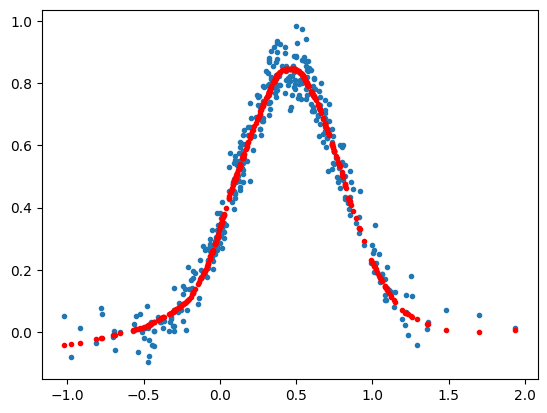

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.transform(x_test)

mlpreg = MLPRegressor(hidden_layer_sizes=(30,30,30), random_state=42)

mlpreg.fit(x_train_scale, y_train)

y_pred = mlpreg.predict(x_test_scale)

plt.plot(x_test, y_test, '.')
plt.plot(x_test, y_pred, 'r.')

print(f'MSE: {mean_squared_error(y_test, y_pred):.4f}')
print(f'R2 Score: {(r2_score(y_test, y_pred) * 100):.2f}%')

<h1 style='font-weight:bold; color:orange'> 12 Deep Learning </h1>

In [ ]:
MLPRegressor(activation='')

<h1 style='font-weight:bold; color:orange'> Test </h1>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_table('Test/question_2.txt', sep=',')
df.head()

,No,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,1,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,2,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,3,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,4,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,5,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


In [ ]:
# define response (Y) and predictor (X) variables
y = df['Compressive Strength (28-day)(Mpa)']
x = df.drop(['Compressive Strength (28-day)(Mpa)', 'SLUMP(cm)', 'FLOW(cm)', 'No'], axis = 1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
lr = LinearRegression()

model = lr.fit(x_train, y_train)

var = x.columns.tolist()

print(pd.DataFrame({'Variable': var, 'Coefficient': model.coef_}))
print(f'Intercept: {model.intercept_:.2f}')


       Variable  Coefficient
0        Cement     4.898330
1          Slag    -1.755212
2       Fly ash     4.658713
3         Water    -4.545214
4            SP     0.423314
5  Coarse Aggr.    -4.638413
6    Fine Aggr.    -2.257704
Intercept: 35.82


In [ ]:
mse = mean_squared_error(y_train, model.predict(x_train))

print(f'MSE: {mse:.2f}')

MSE: 6.90


In [ ]:
?SequentialFeatureSelector

Init signature:
SequentialFeatureSelector(
    estimator,
    *,
    n_features_to_select='auto',
    tol=None,
    direction='forward',
    scoring=None,
    cv=5,
    n_jobs=None,
)
Docstring:     
Transformer that performs Sequential Feature Selection.

This Sequential Feature Selector adds (forward selection) or
removes (backward selection) features to form a feature subset in a
greedy fashion. At each stage, this estimator chooses the best feature to
add or remove based on the cross-validation score of an estimator. In
the case of unsupervised learning, this Sequential Feature Selector
looks only at the features (X), not the desired outputs (y).

Read more in the :ref:`User Guide <sequential_feature_selection>`.

.. versionadded:: 0.24

Parameters
----------
estimator : estimator instance
    An unfitted estimator.

n_features_to_select : "auto", int or float, default="auto"
    If `"auto"`, the behaviour depends on the `tol` parameter:

    - if `tol` is not `None`, then features

<span style='font-weight:bold'> Forward Selection </span>

In [ ]:
sfs = SequentialFeatureSelector(lr,
                                direction='forward',
                                scoring='neg_mean_squared_error')

sfs.fit(x_train, y_train)

selected_features = sfs.get_feature_names_out()
print(selected_features)

['x0' 'x2' 'x3']


<span style='font-weight:bold'> Backward Elimination </span>

In [ ]:
?SequentialFeatureSelector

In [ ]:
sfs = SequentialFeatureSelector(lr,
                                direction='backward',
                                scoring='neg_mean_squared_error',)
sfs.fit(x_train, y_train)
selected_features = sfs.get_feature_names_out()
print(selected_features)

['x0' 'x2' 'x3' 'x5']


In [ ]:
best_model = LinearRegression()
best_model.fit(x_train[selected_features], y_train)

x_pred_best = best_model.predict(x_test[selected_features])
mse_best = mean_squared_error(y_test, x_pred_best)
print(f'Best Model MSE: {mse_best:.2f}')

Best Model MSE: 7.53


In [ ]:
ridge = Ridge()

model_ridge = ridge.fit(x_train, y_train)
y_pred_ridge = model_ridge.predict(x_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f'Ridge Model MSE: {mse_ridge:.2f}')
print(f'Ridge Coefficients: {pd.DataFrame(model_ridge.coef_)}')

Ridge Model MSE: 4.13
Ridge Coefficients:           0
0  5.200274
1 -1.297764
2  5.028981
3 -4.088444
4  0.484226
5 -3.959651
6 -1.792877


In [ ]:
lasso = Lasso()
model_lasso = lasso.fit(x_train, y_train)
y_pred_lasso = model_lasso.predict(x_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f'Lasso Model MSE: {mse_lasso:.2f}')


print(f'Lasso Coefficients: {pd.DataFrame(model_lasso.coef_)}')


Lasso Model MSE: 12.55
Lasso Coefficients:           0
0  4.536146
1  0.000000
2  4.648158
3 -1.174593
4  0.000000
5 -0.321955
6 -0.000000


<span style='font-weight:bold'> Tree Based Method </span>

In [150]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [126]:
boston = pd.read_csv('data/boston.csv')
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [148]:
y = boston['medv']
x = boston.drop('medv', axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.2,
                                                    random_state=42)

scale = StandardScaler()

x_train_scale = scale.fit_transform(x_train)
x_test_scale = scale.fit_transform(x_test)

In [149]:
x_train_scale = pd.DataFrame(x_train_scale, columns=x.columns)

dtr = DecisionTreeRegressor(max_depth=2, random_state=42)
dtr.fit(x_train_scale, y_train)

print(f'MSE: {mean_squared_error(y_train, dtr.predict(x_train))}')

MSE: 564.4473514851481


In [155]:
# bagging since m = p = 13
bag = RandomForestRegressor(max_features=13, random_state=42)
bag.fit(x_train, y_train)

print(f'MSE: {mean_squared_error(y_train, bag.predict(x_train))}')

MSE: 1.9783925024752465


In [ ]:
# Random Forest since m (4) < p (13)
rfr = RandomForestRegressor(max_features=4, random_state=42)
rfr.fit(x_train_scale, y_train)

print(f'MSE: {mean_squared_error(y_train, rfr.predict(x_train))}')

MSE: 80.29666808663366


In [ ]:
boost = GradientBoostingRegressor(n_estimators=500, # number of trees
                                  learning_rate=0.01, # 
                                  max_depth=4, # depth of each tree
                                  random_state=42)

boost.fit(x_train, y_train)

print(f'MSE: {mean_squared_error(y_train, boost.predict(x_train))}')

MSE: 1.6231598332847361


In [164]:
importance = (rfr.feature_importances_ * 100).round(2)

imp = pd.DataFrame({'Variable':x.columns, 
                    'Importance (%)':importance})

print(imp)

   Variable  Importance (%)
0      crim            7.24
1        zn            0.39
2     indus            7.48
3      chas            0.87
4       nox            5.36
5        rm           32.12
6       age            2.23
7       dis            6.70
8       rad            1.05
9       tax            2.59
10  ptratio            5.33
11    black            2.11
12    lstat           26.53


In [162]:
np.sum(rfr.feature_importances_) * 100

100.0

<Axes: xlabel='Variable', ylabel='Importance (%)'>

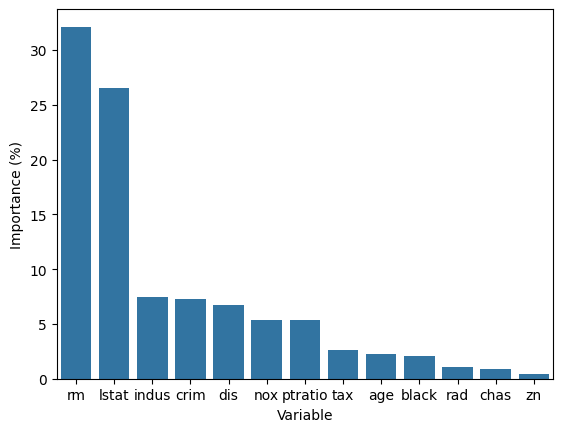

In [168]:
imp = imp.sort_values(by='Importance (%)', ascending=False)
sns.barplot(x='Variable', y='Importance (%)', data = imp)

In [1]:
import pandas as pd

# Create a sample DataFrame
data = {
    'A': [1, 2, 2, 3, 4, 4, 5],
    'B': ['apple', 'banana', 'banana', 'orange', 'grape', 'grape', 'kiwi'],
    'C': [10, 20, 20, 30, 40, 40, 50]
}
df = pd.DataFrame(data)
print("Original DataFrame:")
print(df)

# Drop duplicate rows based on all columns
df_no_duplicates = df.drop_duplicates()
print("\nDataFrame after dropping duplicates (all columns, keeping first):")
print(df_no_duplicates)

Original DataFrame:
   A       B   C
0  1   apple  10
1  2  banana  20
2  2  banana  20
3  3  orange  30
4  4   grape  40
5  4   grape  40
6  5    kiwi  50

DataFrame after dropping duplicates (all columns, keeping first):
   A       B   C
0  1   apple  10
1  2  banana  20
3  3  orange  30
4  4   grape  40
6  5    kiwi  50
